In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the stock market data into a pandas DataFrame
data = pd.read_csv('HistoricalQuotes.csv')

In [2]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
data.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [4]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_price = data[' Close/Last'].str.replace('[^\d.]', '', regex=True).astype(float)
scaled_data = scaler.fit_transform(closing_price.values.reshape(-1, 1))


In [5]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [6]:
# Create sequences of data for the RNN
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [7]:
# Build the RNN model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
predictions = model.predict(X_test)

Epoch 1/10
63/63 [==============================] - 4s 7ms/step - loss: 0.0111
Epoch 2/10
63/63 [==============================] - 0s 6ms/step - loss: 2.7237e-04
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 2.5674e-04
Epoch 4/10
63/63 [==============================] - 0s 6ms/step - loss: 2.4155e-04
Epoch 5/10
63/63 [==============================] - 0s 6ms/step - loss: 2.3674e-04
Epoch 6/10
63/63 [==============================] - 0s 6ms/step - loss: 2.3060e-04
Epoch 7/10
63/63 [==============================] - 0s 7ms/step - loss: 2.3559e-04
Epoch 8/10
63/63 [==============================] - 0s 7ms/step - loss: 2.3538e-04
Epoch 9/10
63/63 [==============================] - 1s 8ms/step - loss: 2.7896e-04
Epoch 10/10
16/16 [==============================] - 1s 4ms/step


In [9]:
# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


In [10]:
# Evaluate the model
mse = np.mean((predictions - y_test)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.589075830795991


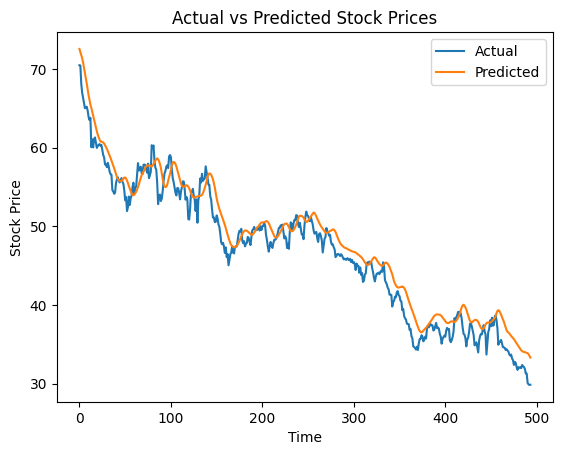

In [11]:
# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()